In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import sem
from scipy.stats import linregress
import scipy.stats as st
import sys

In [2]:
#Path to CSV files

crime_data_load = "Resources/AnyConv.com__Crime_Incidents_in_2017.csv"
#poverty_data_load = "Resources/Poverty_Level_Rates_by_Highest_Level_Education_Att_crosstab.csv" 

#Read data into pandas and store into DataFrames
crime_data = pd.read_csv(crime_data_load)
#poverty_data = pd.read_csv(poverty_data_load)


In [3]:
crime_data.head()

,"CCN,C,80","REPORT_DAT,C,80","SHIFT,C,80","METHOD,C,80","OFFENSE,C,80","BLOCK,C,80","XBLOCK,N,10,0","YBLOCK,N,10,0","WARD,C,80","ANC,C,80",...,"BLOCK_GROU,C,80","CENSUS_TRA,C,80","VOTING_PRE,C,80","LATITUDE,N,24,15","LONGITUDE,N,24,15","BID,C,80","START_DATE,C,80","END_DATE,C,80","OBJECTID,N,10,0","OCTO_RECOR,C,80"
0,2111617,2017-02-06T20:11:14.000Z,EVENING,OTHERS,THEFT/OTHER,600 - 669 BLOCK OF MARYLAND AVENUE NE,400212,136281,6,6C,...,008302 1,8302.0,Precinct 84,38.894376,-76.997556,CAPITOL HILL,2017-02-01T11:55:55.000Z,NaN,306952475,02111617-01
1,7093973,2017-06-03T12:54:27.000Z,DAY,OTHERS,THEFT F/AUTO,2900 - 2999 BLOCK OF N STREET NW,394912,137666,2,2E,...,000100 4,100.0,Precinct 5,38.906838,-77.058661,NaN,2017-06-03T11:54:03.000Z,2017-06-03T11:55:05.000Z,306952489,07093973-01
2,17400847,2017-05-25T13:07:34.000Z,DAY,OTHERS,THEFT F/AUTO,4500 - 4599 BLOCK OF BRANDYWINE STREET NW,392231,142425,3,3E,...,001001 3,1001.0,Precinct 31,38.949689,-77.089625,NaN,2017-05-12T23:00:00.000Z,2017-05-13T09:00:00.000Z,306951085,17400847-01
3,17400849,2017-05-25T19:38:01.000Z,EVENING,OTHERS,THEFT/OTHER,2500 - 2599 BLOCK OF 39TH STREET NW,393318,139472,3,3B,...,000702 1,702.0,Precinct 11,38.923096,-77.077056,NaN,2017-05-14T19:10:00.000Z,2017-05-25T19:10:00.000Z,306951086,17400849-01
4,17400850,2017-05-25T20:18:37.000Z,EVENING,OTHERS,THEFT/OTHER,4100 - 4199 BLOCK OF 8TH STREET NW,397977,141500,4,4C,...,002400 3,2400.0,Precinct 45,38.941388,-77.023335,NaN,2017-05-09T08:00:00.000Z,2017-05-09T18:00:00.000Z,306951087,17400850-01


In [4]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33082 entries, 0 to 33081
Data columns (total 23 columns):
CCN,C,80             33082 non-null int64
REPORT_DAT,C,80      33082 non-null object
SHIFT,C,80           33082 non-null object
METHOD,C,80          33082 non-null object
OFFENSE,C,80         33082 non-null object
BLOCK,C,80           33082 non-null object
XBLOCK,N,10,0        33082 non-null int64
YBLOCK,N,10,0        33082 non-null int64
WARD,C,80            33082 non-null int64
ANC,C,80             33082 non-null object
DISTRICT,C,80        33079 non-null float64
PSA,C,80             33079 non-null float64
NEIGHBORHO,C,80      32712 non-null object
BLOCK_GROU,C,80      32998 non-null object
CENSUS_TRA,C,80      32998 non-null float64
VOTING_PRE,C,80      33082 non-null object
LATITUDE,N,24,15     33082 non-null float64
LONGITUDE,N,24,15    33082 non-null float64
BID,C,80             5830 non-null object
START_DATE,C,80      33082 non-null object
END_DATE,C,80        31585 non-

In [5]:
crime_data.describe()

,"CCN,C,80","XBLOCK,N,10,0","YBLOCK,N,10,0","WARD,C,80","DISTRICT,C,80","PSA,C,80","CENSUS_TRA,C,80","LATITUDE,N,24,15","LONGITUDE,N,24,15","OBJECTID,N,10,0"
count,3.308200e+04,33082.000000,33082.000000,33082.000000,33079.000000,33079.000000,32998.000000,33082.000000,33082.000000,3.308200e+04
mean,1.712021e+07,399396.652711,137623.379451,4.456139,3.721394,376.871489,6280.434329,38.906463,-77.006963,3.072805e+08
std,1.502723e+05,3150.374167,3358.194998,2.335491,1.909450,190.730891,3124.047266,0.030251,0.036323,6.578455e+04
min,2.111617e+06,390262.000000,127300.000000,1.000000,1.000000,101.000000,100.000000,38.813471,-77.112316,3.069501e+08
25%,1.705836e+07,397302.250000,136093.000000,2.000000,2.000000,207.000000,3600.000000,38.892672,-77.031103,3.072732e+08
50%,1.711666e+07,399074.000000,137579.000000,5.000000,3.000000,308.000000,7100.000000,38.906061,-77.010676,3.072815e+08
75%,1.717467e+07,401342.250000,139586.000000,6.000000,5.000000,507.000000,9000.000000,38.924144,-76.984522,3.073028e+08
max,2.709178e+07,407806.000000,147292.000000,8.000000,7.000000,708.000000,11100.000000,38.993560,-76.910021,3.073348e+08


In [6]:
type(crime_data)

pandas.core.frame.DataFrame

In [7]:
# Calculate the total number of methods
method_count = len(crime_data["METHOD,C,80"].unique())
method_count

3

In [8]:
# Calculate the total number of offenses types
offense_count = len(crime_data["OFFENSE,C,80"])
offense_count

33082

In [9]:

# Calculate the total number of neighborhoods
Neighborhood_count = len(crime_data["NEIGHBORHO,C,80"].unique())
Neighborhood_count

40

In [10]:
census_count = len(crime_data["CENSUS_TRA,C,80"].unique())
census_count

180

In [11]:
# Group by Neighborhoods
group_of_neighborhoods = crime_data.set_index('NEIGHBORHO,C,80').groupby(['NEIGHBORHO,C,80']) 
group_of_neighborhoods.count()

,"CCN,C,80","REPORT_DAT,C,80","SHIFT,C,80","METHOD,C,80","OFFENSE,C,80","BLOCK,C,80","XBLOCK,N,10,0","YBLOCK,N,10,0","WARD,C,80","ANC,C,80",...,"BLOCK_GROU,C,80","CENSUS_TRA,C,80","VOTING_PRE,C,80","LATITUDE,N,24,15","LONGITUDE,N,24,15","BID,C,80","START_DATE,C,80","END_DATE,C,80","OBJECTID,N,10,0","OCTO_RECOR,C,80"
"NEIGHBORHO,C,80",,,,,,,,,,,,,,,,,,,,,
Cluster 1,713,713,713,713,713,713,713,713,713,713,...,713,713,713,713,713,263,713,697,713,713
Cluster 10,256,256,256,256,256,256,256,256,256,256,...,252,252,256,256,256,0,256,246,256,256
Cluster 11,508,508,508,508,508,508,508,508,508,508,...,507,507,508,508,508,0,508,489,508,508
Cluster 12,180,180,180,180,180,180,180,180,180,180,...,180,180,180,180,180,0,180,172,180,180
Cluster 13,197,197,197,197,197,197,197,197,197,197,...,197,197,197,197,197,0,197,192,197,197
Cluster 14,234,234,234,234,234,234,234,234,234,234,...,234,234,234,234,234,0,234,217,234,234
Cluster 15,328,328,328,328,328,328,328,328,328,328,...,328,328,328,328,328,0,328,307,328,328
Cluster 16,150,150,150,150,150,150,150,150,150,150,...,150,150,150,150,150,0,150,138,150,150
Cluster 17,891,891,891,891,891,891,891,891,891,891,...,890,890,891,891,891,0,891,836,891,891


In [12]:
# Calculate mean
mean_numpy = crime_data.groupby(["NEIGHBORHO,C,80"]).mean()['CCN,C,80']


In [13]:
# Calculate median
median_numpy = crime_data.groupby(["NEIGHBORHO,C,80"]).median()['CCN,C,80']


In [14]:
# Calculate variance
var_numpy = crime_data.groupby(["NEIGHBORHO,C,80"]).var()['CCN,C,80']


In [15]:
# Calculate standard deviation
sd_numpy = crime_data.groupby(["NEIGHBORHO,C,80"]).std()['CCN,C,80']


In [16]:
# Calculate SEM 
crime_error = crime_data.groupby(["NEIGHBORHO,C,80"]).sem()['CCN,C,80']


In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_df = pd.DataFrame({"Mean": mean_numpy, "Median": median_numpy, "Variance": var_numpy, "Standard Deviation": sd_numpy, 
                          "SEM": crime_error})

In [18]:
# Group by Offenses
group_of_offenses = crime_data.set_index('OFFENSE,C,80').groupby(['OFFENSE,C,80']) 
group_of_offenses.count()

,"CCN,C,80","REPORT_DAT,C,80","SHIFT,C,80","METHOD,C,80","BLOCK,C,80","XBLOCK,N,10,0","YBLOCK,N,10,0","WARD,C,80","ANC,C,80","DISTRICT,C,80",...,"BLOCK_GROU,C,80","CENSUS_TRA,C,80","VOTING_PRE,C,80","LATITUDE,N,24,15","LONGITUDE,N,24,15","BID,C,80","START_DATE,C,80","END_DATE,C,80","OBJECTID,N,10,0","OCTO_RECOR,C,80"
"OFFENSE,C,80",,,,,,,,,,,,,,,,,,,,,
ARSON,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,0,5,4,5,5
ASSAULT W/DANGEROUS WEAPON,1856,1856,1856,1856,1856,1856,1856,1856,1856,1856,...,1846,1846,1856,1856,1856,164,1856,1703,1856,1856
BURGLARY,1531,1531,1531,1531,1531,1531,1531,1531,1531,1531,...,1527,1527,1531,1531,1531,154,1531,1460,1531,1531
HOMICIDE,115,115,115,115,115,115,115,115,115,115,...,114,114,115,115,115,4,115,107,115,115
MOTOR VEHICLE THEFT,2408,2408,2408,2408,2408,2408,2408,2408,2408,2408,...,2393,2393,2408,2408,2408,192,2408,2299,2408,2408
ROBBERY,2170,2170,2170,2170,2170,2170,2170,2170,2170,2170,...,2160,2160,2170,2170,2170,228,2170,1973,2170,2170
SEX ABUSE,293,293,293,293,293,293,293,293,293,293,...,293,293,293,293,293,33,293,281,293,293
THEFT F/AUTO,10259,10259,10259,10259,10259,10259,10259,10259,10259,10258,...,10230,10230,10259,10259,10259,1358,10259,10002,10259,10259
THEFT/OTHER,14445,14445,14445,14445,14445,14445,14445,14445,14445,14443,...,14430,14430,14445,14445,14445,3697,14445,13756,14445,14445


In [19]:
# Calculate mean
mean_numpy = crime_data.groupby(["OFFENSE,C,80"]).mean()['CCN,C,80']


In [20]:
# Calculate median
median_numpy = crime_data.groupby(["OFFENSE,C,80"]).median()['CCN,C,80']


In [21]:
# Calculate variance
variance_numpy = crime_data.groupby(["OFFENSE,C,80"]).var()['CCN,C,80']

In [22]:
# Calculate standard deviation
sd_numpy = crime_data.groupby(["OFFENSE,C,80"]).std()['CCN,C,80']


In [23]:
# Calculate SEM 
crime_error = crime_data.groupby(["OFFENSE,C,80"]).sem()['CCN,C,80']


In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the crime volume for each offense


summary_df1 = pd.DataFrame({"Mean": mean_numpy, "Median": median_numpy, "Variance": variance_numpy, "Standard Deviation": sd_numpy, 
                          "SEM": crime_error})
summary_df1

,Mean,Median,Variance,Standard Deviation,SEM
"OFFENSE,C,80",,,,,
ARSON,1.707846e+07,17068343.0,2.618744e+09,51173.663951,22885.558251
ASSAULT W/DANGEROUS WEAPON,1.710950e+07,17110625.5,4.759102e+09,68986.244403,1601.302998
BURGLARY,1.711062e+07,17108946.0,4.398577e+09,66321.771160,1694.995386
HOMICIDE,1.700598e+07,17116708.0,6.314259e+11,794623.141960,74098.990062
MOTOR VEHICLE THEFT,1.711400e+07,17115314.5,4.710669e+09,68634.315223,1398.662927
ROBBERY,1.711501e+07,17119288.0,4.370216e+09,66107.606570,1419.127993
SEX ABUSE,1.710805e+07,17108272.0,3.861956e+09,62144.636606,3630.528435
THEFT F/AUTO,1.711861e+07,17112703.0,1.798064e+10,134091.915427,1323.884445
THEFT/OTHER,1.712673e+07,17120310.0,3.118170e+10,176583.406139,1469.234496


In [25]:
# Generate a bar plot showing the number of offenses per neighborhood
# Group by Neighborhood and Offense type
grouped_data = pd.DataFrame(crime_data.groupby(["NEIGHBORHO,C,80"]).count()).reset_index()
neighborhood_datapoints = grouped_data[["NEIGHBORHO,C,80", "OFFENSE,C,80"]] 
neighborhood_datapoints = neighborhood_datapoints.rename(columns={"OFFENSE,C,80": "Offense count"})
neighborhood_datapoints = neighborhood_datapoints.set_index("NEIGHBORHO,C,80")



In [26]:
# Generate a bar plot showing the number of crime count per each offense.

# Group by Offense type
grouped_data = pd.DataFrame(crime_data.groupby(["OFFENSE,C,80"]).count()).reset_index()
offense_datapoints = grouped_data[["OFFENSE,C,80", "CCN,C,80"]] 
offense_datapoints = offense_datapoints.rename(columns={"CCN,C,80": "Crime Count"})
offense_datapoints = offense_datapoints.set_index("OFFENSE,C,80")


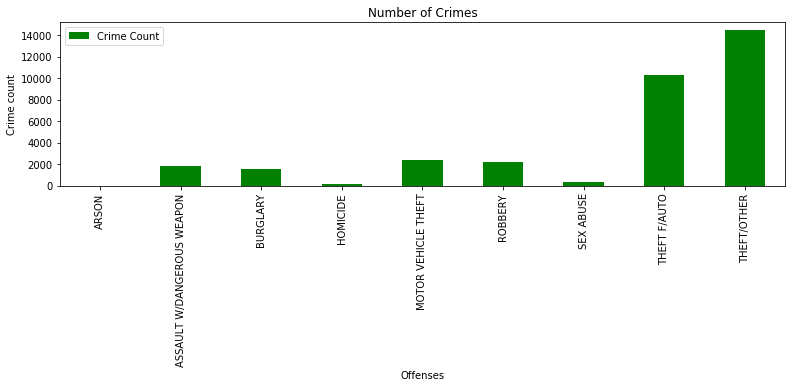

In [27]:
# Use DataFrame.plot() in order to create a bar chart of the data
offense_datapoints.plot(kind="bar", figsize=(13,3), color = "g")

#Give the chart a title, x label, and y label
plt.title("Number of Crimes")
plt.ylabel("Crime count")
plt.xlabel("Offenses")
plt.show()


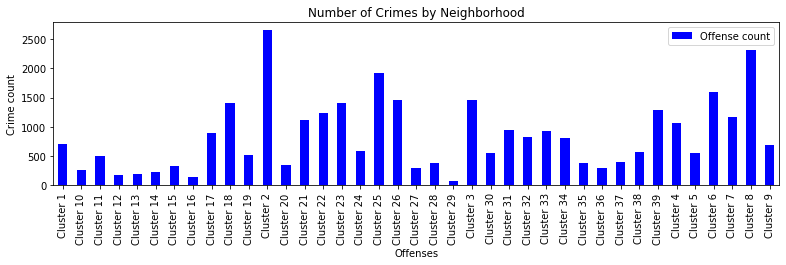

In [28]:
# Use DataFrame.plot() in order to create a bar chart of the data
neighborhood_datapoints.plot(kind="bar", figsize=(13,3), color = "b")

#Give the chart a title, x label, and y label
plt.title("Number of Crimes by Neighborhood")
plt.ylabel("Crime count")
plt.xlabel("Offenses")
plt.show()

Text(0.5, 1.0, 'Distribution of Crime by Weapon')

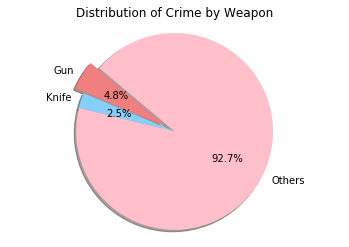

In [29]:
# Generate a pie plot showing the distribution of crime by weapon

# Group by method and get values of each section of the pie chart
weapon_count = (crime_data.groupby(["METHOD,C,80"])["CCN,C,80"]).count().tolist()

# Labels for the sections of our pie chart
labels = ["Gun", "Knife", "Others"]

# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue", "pink"]

# Tells matplotlib to seperate the "Sex" section from the Mice Count
explode = (0.1, 0, 0)

# Creates the pie chart based upon the values above
plt.pie(weapon_count, explode=explode, labels=labels, colors = colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

plt.title("Distribution of Crime by Weapon")

In [32]:
# Group by neighborhoods and get values of top 4 neighborhoods with crime.
top_crime = crime_data[crime_data["NEIGHBORHO,C,80"].isin(["Cluster 2", "Cluster 8", "Cluster 18", "Cluster 25"])]
top_crime

,"CCN,C,80","REPORT_DAT,C,80","SHIFT,C,80","METHOD,C,80","OFFENSE,C,80","BLOCK,C,80","XBLOCK,N,10,0","YBLOCK,N,10,0","WARD,C,80","ANC,C,80",...,"BLOCK_GROU,C,80","CENSUS_TRA,C,80","VOTING_PRE,C,80","LATITUDE,N,24,15","LONGITUDE,N,24,15","BID,C,80","START_DATE,C,80","END_DATE,C,80","OBJECTID,N,10,0","OCTO_RECOR,C,80"
0,2111617,2017-02-06T20:11:14.000Z,EVENING,OTHERS,THEFT/OTHER,600 - 669 BLOCK OF MARYLAND AVENUE NE,400212,136281,6,6C,...,008302 1,8302.0,Precinct 84,38.894376,-76.997556,CAPITOL HILL,2017-02-01T11:55:55.000Z,NaN,306952475,02111617-01
4,17400850,2017-05-25T20:18:37.000Z,EVENING,OTHERS,THEFT/OTHER,4100 - 4199 BLOCK OF 8TH STREET NW,397977,141500,4,4C,...,002400 3,2400.0,Precinct 45,38.941388,-77.023335,NaN,2017-05-09T08:00:00.000Z,2017-05-09T18:00:00.000Z,306951087,17400850-01
6,17400852,2017-05-25T21:47:26.000Z,EVENING,OTHERS,THEFT/OTHER,3640 - 3699 BLOCK OF NEW HAMPSHIRE AVENUE NW,397854,140871,4,4C,...,002502 2,2502.0,Precinct 49,38.935722,-77.024752,NaN,2017-05-25T09:00:00.000Z,2017-05-25T12:05:00.000Z,306951089,17400852-01
8,17400856,2017-05-20T03:25:31.000Z,MIDNIGHT,OTHERS,THEFT/OTHER,700 - 799 BLOCK OF F STREET NW,398054,136595,2,2C,...,005800 1,5800.0,Precinct 129,38.897203,-77.022433,DOWNTOWN,2017-05-20T03:05:00.000Z,2017-05-20T03:10:00.000Z,306951091,17400856-01
13,17400867,2017-05-29T12:45:25.000Z,DAY,OTHERS,THEFT/OTHER,300 - 399 BLOCK OF C STREET NE,399886,136192,6,6C,...,008200 2,8200.0,Precinct 84,38.893574,-77.001314,CAPITOL HILL,2017-05-15T14:10:00.000Z,2017-05-18T21:25:00.000Z,306951096,17400867-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33066,17211692,2017-12-08T15:03:28.000Z,EVENING,OTHERS,BURGLARY,1300 - 1399 BLOCK OF EMERALD STREET NE,401135,136541,6,6A,...,008001 2,8001.0,Precinct 81,38.896718,-76.986916,NaN,2017-12-07T16:00:35.000Z,2017-12-08T15:03:26.000Z,307334069,17211692-01
33067,17211693,2017-12-08T14:41:48.000Z,DAY,OTHERS,THEFT/OTHER,1200 - 1299 BLOCK OF G STREET NW,397497,136718,2,2C,...,005800 1,5800.0,Precinct 129,38.898309,-77.028854,DOWNTOWN,2017-12-08T14:10:34.000Z,2017-12-08T14:20:39.000Z,307334070,17211693-01
33078,17211745,2017-12-08T16:19:56.000Z,EVENING,OTHERS,THEFT/OTHER,1900 - 1999 BLOCK OF D STREET NE,402017,136325,7,7D,...,007903 1,7903.0,Precinct 80,38.894770,-76.976749,NaN,2017-12-07T13:44:23.000Z,2017-12-07T13:59:07.000Z,307334081,17211745-01
33080,17211757,2017-12-08T16:51:36.000Z,EVENING,OTHERS,THEFT/OTHER,1600 - 1699 BLOCK OF PARK ROAD NW,396736,140470,1,1D,...,002702 1,2702.0,Precinct 40,38.932106,-77.037645,NaN,2017-12-08T16:10:00.000Z,2017-12-08T16:15:07.000Z,307334083,17211757-01


In [34]:
# Sort values by timepoint
top_crime.sorted = top_crime.sort_values(["METHOD,C,80"], ascending=True)
top_crime.sorted.head()

,"CCN,C,80","REPORT_DAT,C,80","SHIFT,C,80","METHOD,C,80","OFFENSE,C,80","BLOCK,C,80","XBLOCK,N,10,0","YBLOCK,N,10,0","WARD,C,80","ANC,C,80",...,"BLOCK_GROU,C,80","CENSUS_TRA,C,80","VOTING_PRE,C,80","LATITUDE,N,24,15","LONGITUDE,N,24,15","BID,C,80","START_DATE,C,80","END_DATE,C,80","OBJECTID,N,10,0","OCTO_RECOR,C,80"
8635,17079712,2017-05-13T00:11:49.000Z,MIDNIGHT,GUN,ROBBERY,513 - 699 BLOCK OF ROCK CREEK CHURCH ROAD NW,398220,141027,1,1A,...,003200 1,3200.0,Precinct 43,38.937128,-77.020531,NaN,2017-05-12T22:50:03.000Z,2017-05-13T00:12:09.000Z,307273580,17079712-01
3831,17031218,2017-02-23T22:40:48.000Z,EVENING,GUN,ASSAULT W/DANGEROUS WEAPON,1108 - 1199 BLOCK OF 12TH STREET NW,397564,137457,2,2F,...,005002 4,5002.0,Precinct 17,38.904967,-77.028085,NaN,2017-02-23T21:10:04.000Z,2017-02-23T21:11:44.000Z,307266520,17031218-01
23703,17138429,2017-08-11T22:21:36.000Z,EVENING,GUN,ASSAULT W/DANGEROUS WEAPON,1300 - 1399 BLOCK OF COLUMBIA ROAD NW,397302,139967,1,1A,...,003000 2,3000.0,Precinct 36,38.927577,-77.031115,NaN,2017-08-11T18:10:17.000Z,2017-08-11T20:45:02.000Z,307301677,17138429-01
13250,17056401,2017-04-07T02:26:13.000Z,MIDNIGHT,GUN,ASSAULT W/DANGEROUS WEAPON,3900 - 3999 BLOCK OF 14TH STREET NW,397162,141258,4,4C,...,002502 4,2502.0,Precinct 47,38.939206,-77.032735,NaN,2017-04-06T23:28:40.000Z,2017-04-06T23:30:02.000Z,307278198,17056401-01
14011,17116737,2017-07-08T08:58:37.000Z,DAY,GUN,ASSAULT W/DANGEROUS WEAPON,3000 - 3099 BLOCK OF 14TH STREET NW,397174,140033,1,1A,...,002802 1,2802.0,Precinct 36,38.928171,-77.032592,NaN,2017-07-08T07:10:30.000Z,2017-07-08T08:58:37.000Z,307278959,17116737-01


In [35]:
# Narrow data down to four columns
top_crime_data = top_crime[["NEIGHBORHO,C,80", "OFFENSE,C,80", "METHOD,C,80", "CCN,C,80"]]
top_crime_data

,"NEIGHBORHO,C,80","OFFENSE,C,80","METHOD,C,80","CCN,C,80"
0,Cluster 25,THEFT/OTHER,OTHERS,2111617
4,Cluster 18,THEFT/OTHER,OTHERS,17400850
6,Cluster 18,THEFT/OTHER,OTHERS,17400852
8,Cluster 8,THEFT/OTHER,OTHERS,17400856
13,Cluster 25,THEFT/OTHER,OTHERS,17400867
...,...,...,...,...
33066,Cluster 25,BURGLARY,OTHERS,17211692
33067,Cluster 8,THEFT/OTHER,OTHERS,17211693
33078,Cluster 25,THEFT/OTHER,OTHERS,17211745
33080,Cluster 2,THEFT/OTHER,OTHERS,17211757


In [83]:
# Group by method and get values of each 
top_crime_weapon_count = (top_crime_data.groupby(["METHOD,C,80"])["CCN,C,80"]).count()
top_crime_weapon_count

METHOD,C,80
GUN        238
KNIFE      160
OTHERS    7891
Name: CCN,C,80, dtype: int64

In [69]:
# Group by method and get values of each 
top_crime_weapon_count = (top_crime_data.groupby(["METHOD,C,80"])["CCN,C,80"]).count().tolist()



# Narrow data down to the last timepoint 
top_crime_weapon = top_crime_data.loc[top_crime_data["CCN,C,80"] >= 1500]
top_crime_weapon

# Group by method and get values of each 
top_crime_weapon_count = (top_crime_weapon.groupby(["METHOD,C,80"])["CCN,C,80"]).count().tolist()
top_crime_weapon_count

Sort and display the top five performing schools by % overall passing
top_five = top_crime_weapon_count.sort_values("OFFENSE,C,80", ascending = False)
top_five.head(50).style.format({

})


SyntaxError: invalid syntax (<ipython-input-69-0fc7176d4b52>, line 14)

In [84]:
# Calculate the crime volume of top crime neighborhoods across crime weapon. Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Group by neighborhoods and get values of top 4 neighborhoods with crime.
top_crime = crime_data[crime_data["NEIGHBORHO,C,80"].isin(["Cluster 2", "Cluster 8", "Cluster 18", "Cluster 25"])]

# Sort values by timepoint
top_crime.sorted = top_crime.sort_values(["METHOD,C,80"], ascending=True)

# Narrow data down to four columns
top_crime_data = top_crime[["NEIGHBORHO,C,80", "OFFENSE,C,80", "METHOD,C,80", "CCN,C,80"]]



# Sort and clean data to use for box plot
sorted_crime_data_last = top_crime_data.groupby(["NEIGHBORHO,C,80", 'CCN,C,80']).last()['METHOD,C,80']

#Create a list to use as labels and dataframe
top_4 = ['Cluster 2', 'Cluster 8', 'Cluster 18','Cluster 25']

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_df = sorted_crime_data_last.reset_index()
weapon_lists = final_df.groupby('NEIGHBORHO,C,80')['METHOD,C,80'].count().apply(list)
weapon_list_df = pd.DataFrame(weapon_lists)
weapon_list_df = weapon_list_df.reindex(top_4)
weapon_vols = [vol for vol in weapon_list_df['METHOD,C,80']]
plt.boxplot(weapon_vols, labels=top_4)
plt.ylim(10, 80)

# Give the chart a title, x label, and y label
plt.title("Final Tumor Volume of each Mouse across four Regimens")
plt.xlabel("Neighborhood")
plt.ylabel("Weapon")
plt.show()

C:\Users\anagi\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys


TypeError: 'int' object is not iterable